<a href="https://colab.research.google.com/github/PredaX6145/PrediksiHargaRumah/blob/main/Tugas_Kelompok_Prasiskom_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 1
1. Ghias Wahyu Suprianto
2. Indah Yanwari Dewi
3. Valentino Dermawan

Langkah 1

1. Pembentukan Kelompok dan Pengenalan Data
- Bentukkelompokyang terdiridari3-4 orang.
- Unduhdataset dari
https://drive.google.com/file/d/1GgpRmCV_Z1r8fenPacC1ucOS0NKnuAXr/view?usp=sharing
- Lakukan eksplorasi awal data untuk memahami fitur-fitur yang tersedia.

In [ ]:
import pandas as pd

# Tampilkan semua kolom agar tidak terpotong
pd.set_option('display.max_columns', None)

# Baca file CSV
df = pd.read_csv("train.csv")

# Tampilkan ukuran data (baris, kolom)
print("Ukuran data:", df.shape)

# Tampilkan nama kolom dan tipe datanya
print("\nTipe data tiap kolom:")
print(df.dtypes)

# Tampilkan jumlah nilai unik tiap kolom
print("\nJumlah nilai unik tiap kolom:")
print(df.nunique())

# Tampilkan 5 baris pertama dari data
print("\nLima baris pertama:")
print(df.head())

# Tampilkan seluruh isi dari baris pertama
print("\nSeluruh isi baris pertama:")
print(df.iloc[0])


Ukuran data: (1460, 81)

Tipe data tiap kolom:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Jumlah nilai unik tiap kolom:
Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

Lima baris pertama:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60

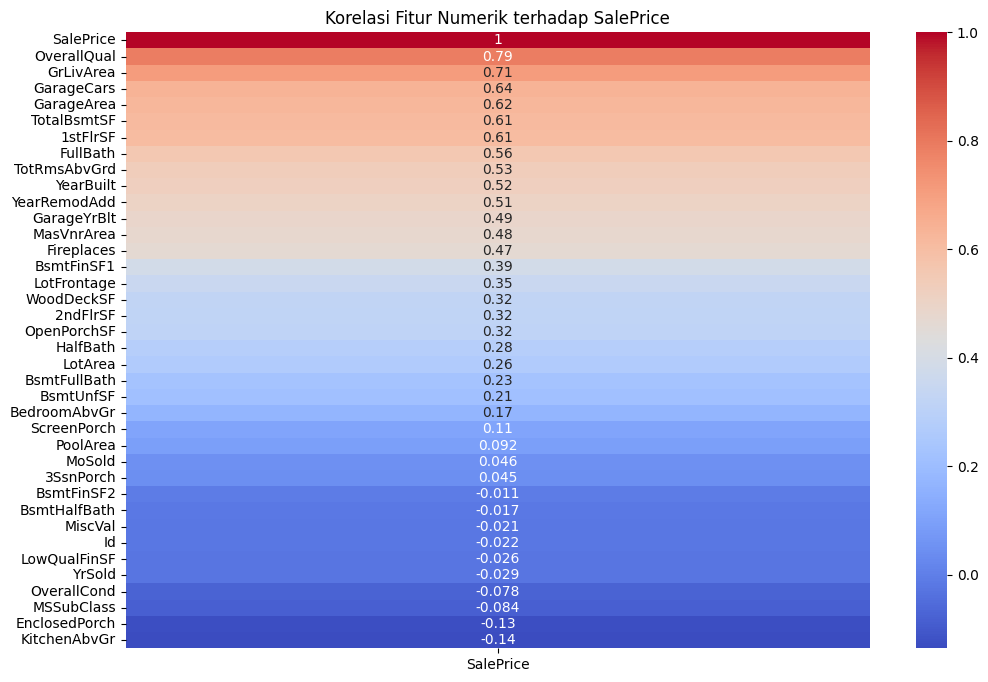

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
corr = numeric_df.corr()

# Plot korelasi terhadap SalePrice (jika ada kolom itu)
if 'SalePrice' in corr.columns:
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
    plt.title('Korelasi Fitur Numerik terhadap SalePrice')
    plt.show()
else:
    print("Kolom 'SalePrice' tidak ditemukan di data.")


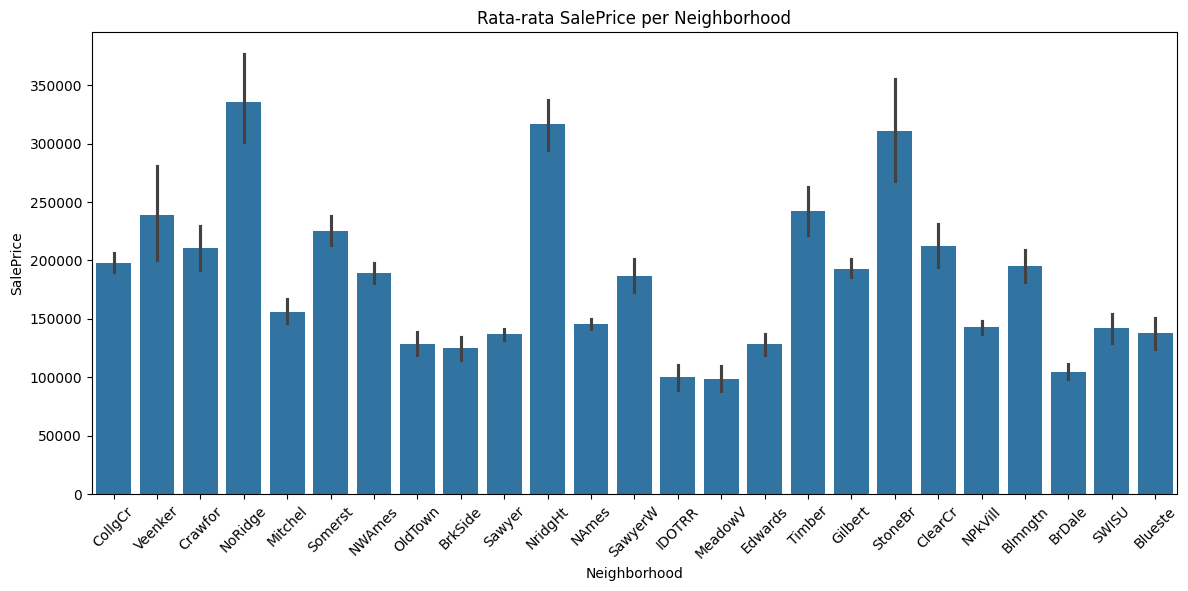

In [ ]:
# Contoh kategorikal: Neighborhood terhadap rata-rata harga rumah
plt.figure(figsize=(14,6))
sns.barplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=45)
plt.title('Rata-rata SalePrice per Neighborhood')
plt.show()


Langkah ke-2 (Preprocessing Data)
- Pembersihan Data: Identifikasidan tanganimissing values, outliers, dan kesalahaninput data
- TransformasiData: Lakukannormalisasiataustandarisasipada data numerik. Untukdata kategorikal, gunakantekniksepertione-hot encoding ataulabel encoding.
- SeleksiFitur: Tentukanfitur-fituryang relevanuntukmodel prediktif. Gunakanteknikseperticorrelation matrix, backward elimination, ataumetodelain yang sesuai.

In [ ]:
# Cek jumlah missing values tiap kolom
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [ ]:
print("Missing values per column:")
print(missing[missing > 0].sort_values(ascending=False))

Missing values per column:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [ ]:
# Tangani missing values numerik dengan rata-rata
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.fillna(x.mean()), axis=0)

# Tangani missing values kategorikal dengan modus
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# Cek hasil
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [ ]:
# Menghitung IQR (Interquartile Range) untuk kolom numerik
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Menyaring data yang berada di luar rentang IQR (outliers)
data_no_outliers = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Menampilkan data setelah menghapus outliers
print(f"Data setelah menghapus outliers: {data_no_outliers.shape}")

df_outlier = data_no_outliers.copy()



Data setelah menghapus outliers: (557, 81)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalisasi
df_normalized = df_outlier[numerical_columns].copy()
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_normalized)

# Standarisasi
df_standardized = df_outlier[numerical_columns].copy()
standardizer = StandardScaler()
df_standardized = standardizer.fit_transform(df_standardized)

print("Data setelah normalisasi:")
print(df_normalized)

print("\nData setelah standarisasi:")
print(df_standardized)


Data setelah normalisasi:
[[0.         0.4        0.44       ... 0.09090909 0.5        0.56518138]
 [0.00137457 0.4        0.48       ... 0.72727273 0.5        0.61487494]
 [0.00274914 0.4        0.69333333 ... 1.         0.5        0.70266689]
 ...
 [0.99862543 0.         0.77333333 ... 0.54545455 0.         0.15438132]
 [0.99931271 0.         0.4        ... 0.81818182 0.75       0.48732814]
 [1.         0.4        0.4        ... 0.63636364 0.25       0.45419911]]

Data setelah standarisasi:
[[-1.76895219  0.35698604 -0.28003019 ... -1.6339286   0.16176364
   0.53555554]
 [-1.7641787   0.35698604 -0.05236509 ...  1.00622374  0.16176364
   0.80720564]
 [-1.7594052   0.35698604  1.16184876 ...  2.1377176   0.16176364
   1.28712083]
 ...
 [ 1.69899094 -0.91763718  1.61717896 ...  0.2518945  -1.35256152
  -1.71008534]
 [ 1.70137769 -0.91763718 -0.50769529 ...  1.38338836  0.91892622
   0.10997037]
 [ 1.70376444  0.35698604 -0.50769529 ...  0.62905912 -0.59539894
  -0.0711297 ]]


In [ ]:
# Melakukan One-Hot Encoding pada kolom kategorikal
data = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Menampilkan data setelah encoding
print("Data setelah One-Hot Encoding:")
print(data.head())


Data setelah One-Hot Encoding:
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  

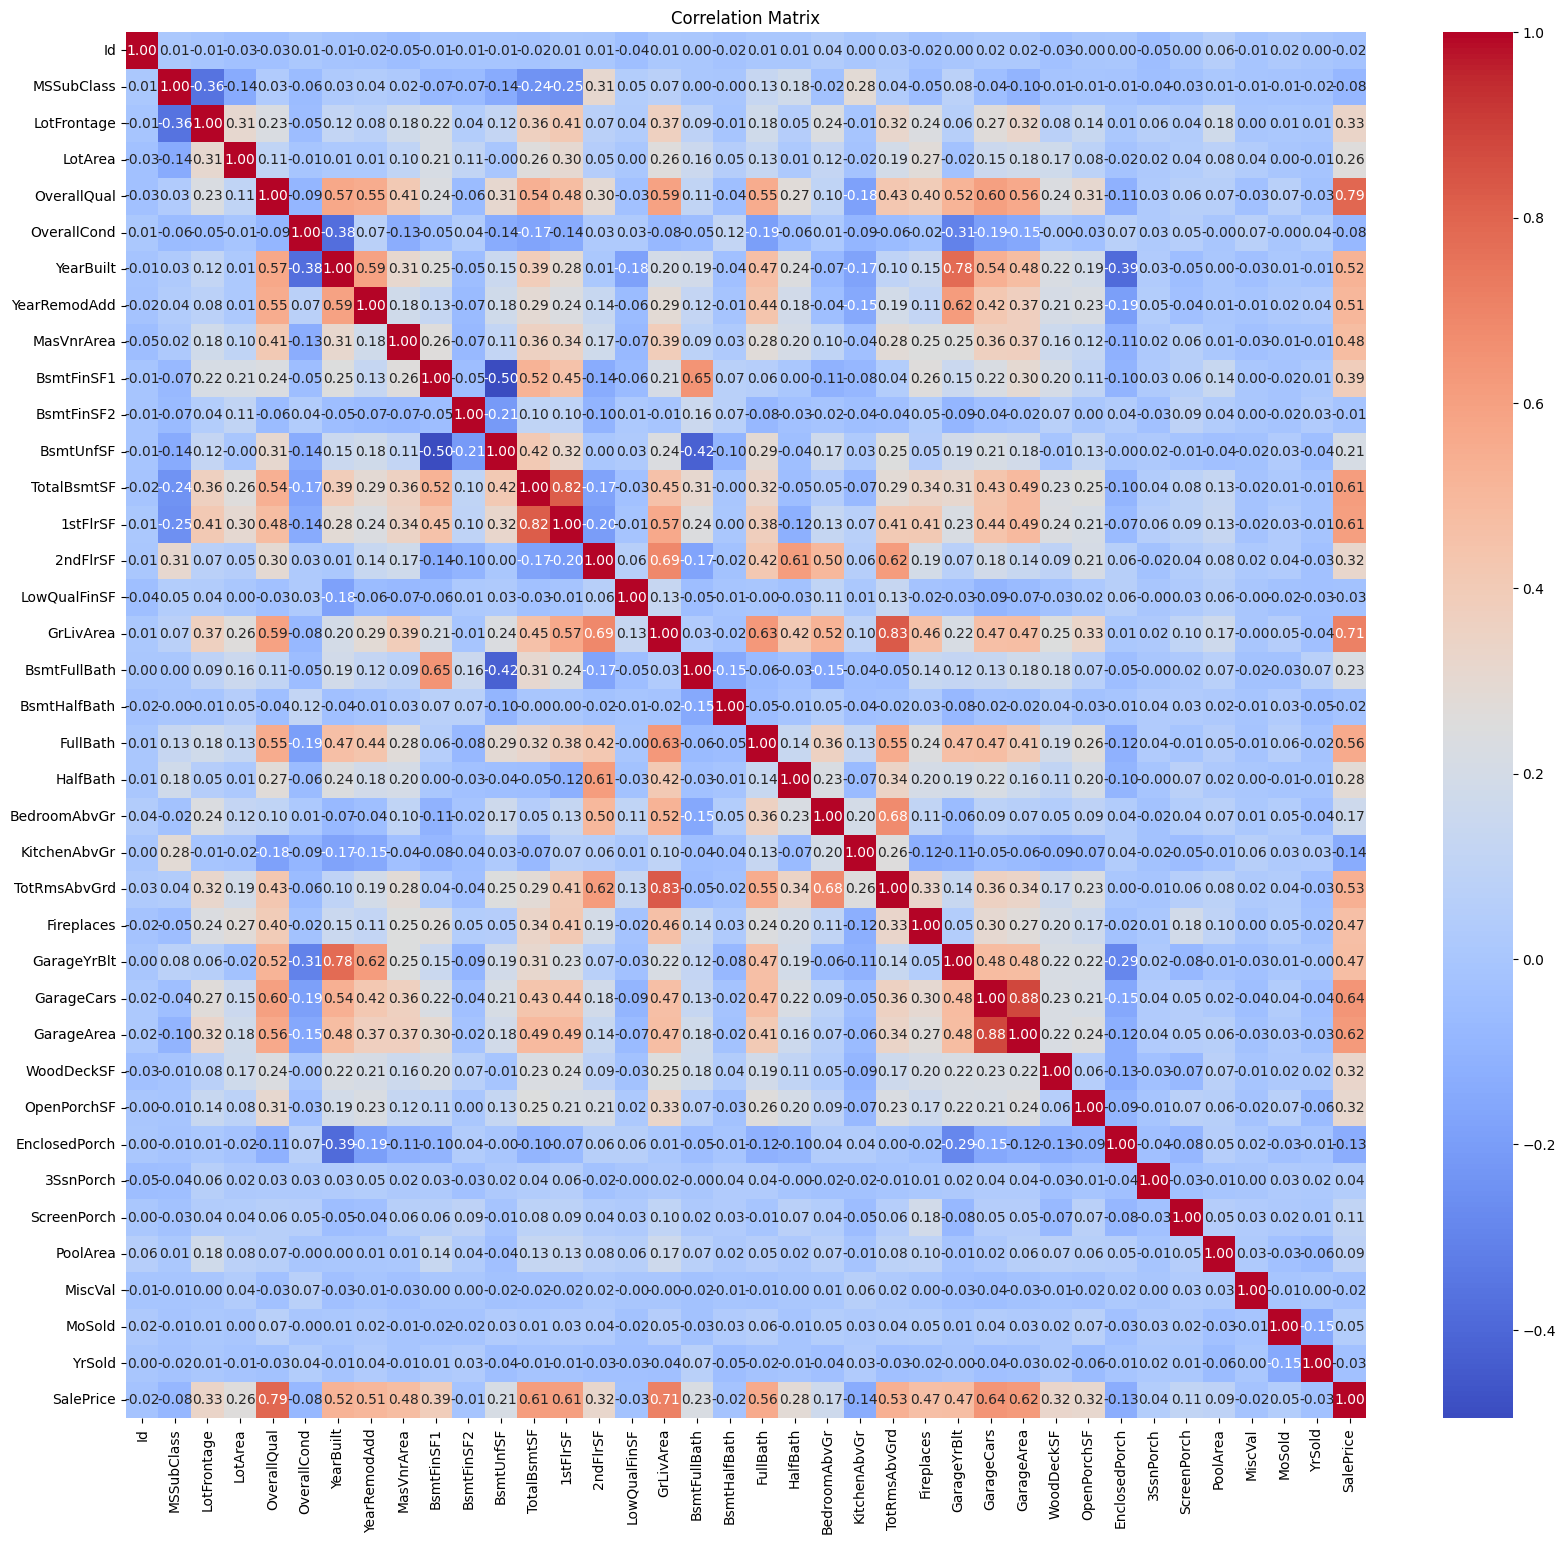

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = data[numerical_columns].corr()

# Menampilkan matriks korelasi dengan heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


Langkah 3
AnalisisEksploratifData (EDA)
- Visualisasikan distribusi dari beberapa fitur utama dan target (harga rumah)
- Analisis hubungan antar fitur menggunakan scatter plots, box plots, dan lain-lain
- Buat hipotesis tentang fitur-fitur yang mungkin memiliki pengaruh besar terhadap harga rumah.

Kolom numerik: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


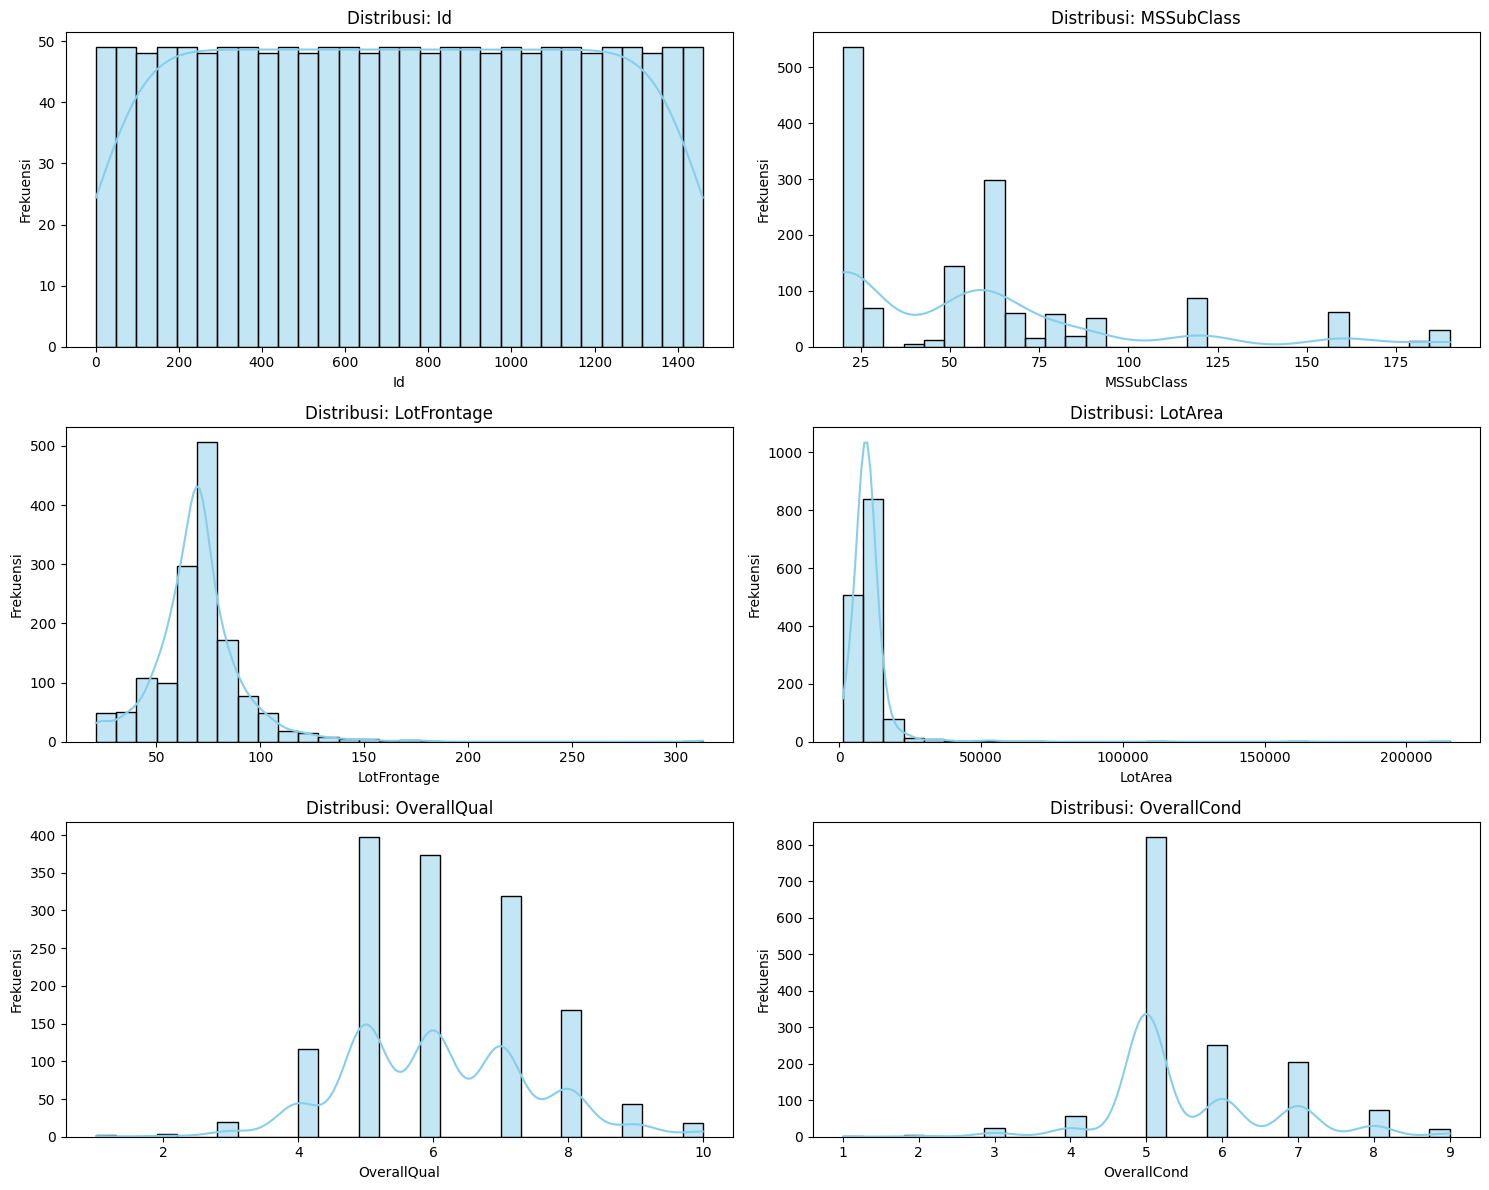

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cek kolom numerik
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Tampilkan nama kolom numerik biar tahu apa aja yang akan diplot
print("Kolom numerik:", list(numerical_columns))

# Buat plot distribusi
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns[:6]):  # Batasi ke 6 fitur biar nggak terlalu banyak
    plt.subplot(3, 2, i+1)
    sns.histplot(data[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


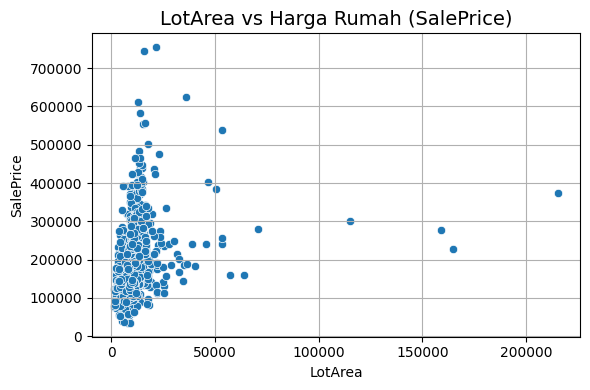

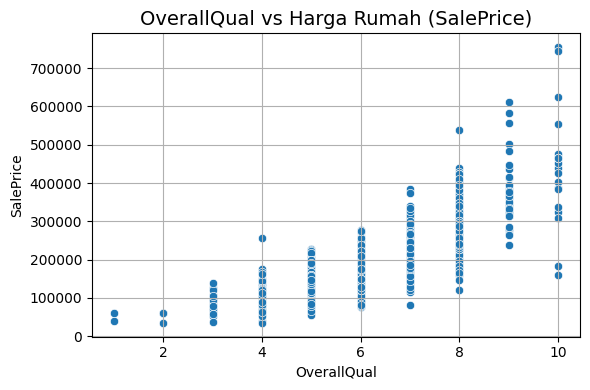

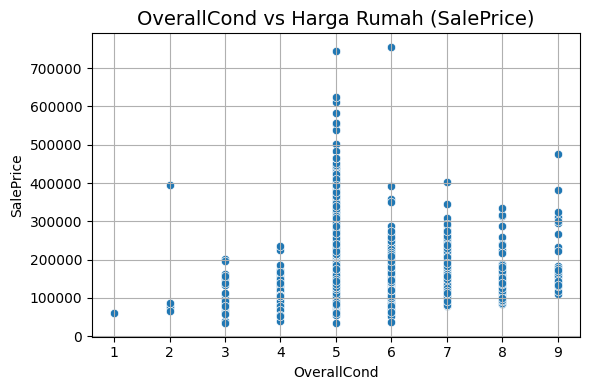

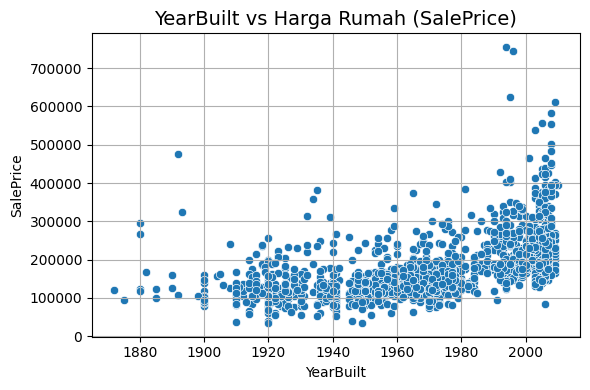

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih beberapa fitur numerik utama yang umum dipakai
fitur_numerik = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']

# Visualisasikan scatter plot untuk masing-masing fitur vs SalePrice
for fitur in fitur_numerik:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=fitur, y='SalePrice')
    plt.title(f'{fitur} vs Harga Rumah (SalePrice)', fontsize=14)
    plt.xlabel(fitur)
    plt.ylabel('SalePrice')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Hipotesis  fitur-fitur yang mungkin memiliki pengaruh besar terhadap harga rumah.

1. GrLivArea (Ground Living Area)
- Hipotesis: Semakin luas area hunian utama (GrLivArea), semakin tinggi harga rumah.
- Alasan: Luas bangunan biasanya menjadi indikator utama dalam menilai properti.

2. OverallQual (Overall Material and Finish Quality)
- Hipotesis: Rumah dengan kualitas konstruksi dan penyelesaian yang lebih baik (OverallQual tinggi) cenderung memiliki harga yang lebih mahal
- Alasan: Kualitas bangunan memengaruhi daya tahan dan kenyamanan rumah.

3. YearBuilt (Tahun Dibangun)
- Hipotesis: Rumah yang dibangun lebih baru kemungkinan memiliki harga lebih tinggi karena menggunakan material dan desain yang lebih modern
- Alasan: Tahun pembangunan berhubungan dengan kondisi fisik rumah.

4. TotRmsAbvGrd (Total Rooms Above Ground)
- Hipotesis: Rumah dengan lebih banyak ruangan cenderung memiliki harga lebih tinggi.
- Alasan: Jumlah ruangan menunjukkan fungsi dan kapasitas rumah untuk menampung aktivitas keluarga.

5. MasVnrArea (Masonry Veneer Area)
- Hipotesis: Semakin besar area veneer batu bata atau batu di bagian luar rumah, semakin mahal rumah tersebut.
- Alasan: Veneer biasanya digunakan pada rumah dengan gaya eksterior mewah atau bernilai tinggi.

6. BldgType (Building Type)
- Hipotesis: Tipe bangunan seperti rumah tunggal (1Fam) cenderung lebih mahal dibandingkan dengan rumah town house atau tipe apartemen.
- Alasan: Tipe bangunan menentukan eksklusivitas dan ukuran lahan.

7. GarageFinish (Tipe Penyelesaian Garasi)
- Hipotesis: Garasi yang selesai (Finished) atau dilengkapi dengan baik meningkatkan nilai rumah.
- Alasan: Garasi yang bagus menambah nilai kenyamanan dan fungsionalitas.

8. Neighborhood (Lingkungan/Kompleks)
- Hipotesis: Lokasi rumah yang berada di lingkungan premium atau strategis akan meningkatkan harga rumah.
- Alasan: Lokasi adalah faktor kunci dalam penilaian properti.

Fitur yang digunakan oleh kelompok 1 untuk memprediksi sale price atau yang digunakan saat pelatihan data adalah:
1. GrlivArea
2. GarageCars
3. GarageArea
4. TotalBsmtSF
5. JstFlrSF
6. Fullbath
7. TotRmsAbvGrd
8. YearBuilt
9. YearRemodAdd
10. GarageYrBlt